In [75]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix # for model evaluation metrics
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

%matplotlib inline

Cardio = pd.read_csv('cardio_train_upd.csv', sep=";", index_col=0)
Cardio.head()


#Features:

#Age | Objective Feature | age | int (days)
#Height | Objective Feature | height | int (cm) |
#Weight | Objective Feature | weight | float (kg) |
#Gender | Objective Feature | gender | categorical code | 1 - women, 2 - men
#Systolic blood pressure | Examination Feature | ap_hi | int |
#Diastolic blood pressure | Examination Feature | ap_lo | int |
#Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
#Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
#Smoking | Subjective Feature | smoke | binary |
#Alcohol intake | Subjective Feature | alco | binary |
#Physical activity | Subjective Feature | active | binary |
#Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [2]:
Cardio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


In [3]:
Cardio.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [4]:
Cardio.age = Cardio.age / 365
Cardio = Cardio[(Cardio.age < 100) & (Cardio.ap_hi <= 310) & (Cardio.ap_hi > 50) & (Cardio.ap_lo > 40)& (Cardio.ap_lo < 220) ]
Cardio = Cardio.drop_duplicates()
Cardio.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
Cardio.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
age,68735.0,53.327555,6.762205,29.583562,48.378082,53.975342,58.421918,64.967123
gender,68735.0,1.348832,0.476604,1.000000,1.000000,1.000000,2.000000,2.000000
height,68735.0,164.362566,8.185765,55.000000,159.000000,165.000000,170.000000,250.000000
weight,68735.0,74.125955,14.331694,11.000000,65.000000,72.000000,82.000000,200.000000
ap_hi,68735.0,126.619277,16.760333,70.000000,120.000000,120.000000,140.000000,240.000000
ap_lo,68735.0,81.392304,9.658955,45.000000,80.000000,80.000000,90.000000,190.000000
cholesterol,68735.0,1.364851,0.679076,1.000000,1.000000,1.000000,2.000000,3.000000
gluc,68735.0,1.226057,0.572036,1.000000,1.000000,1.000000,1.000000,3.000000
smoke,68735.0,0.088048,0.283367,0.000000,0.000000,0.000000,0.000000,1.000000
alco,68735.0,0.053670,0.225367,0.000000,0.000000,0.000000,0.000000,1.000000


In [6]:
Cardio.shape

(68735, 12)

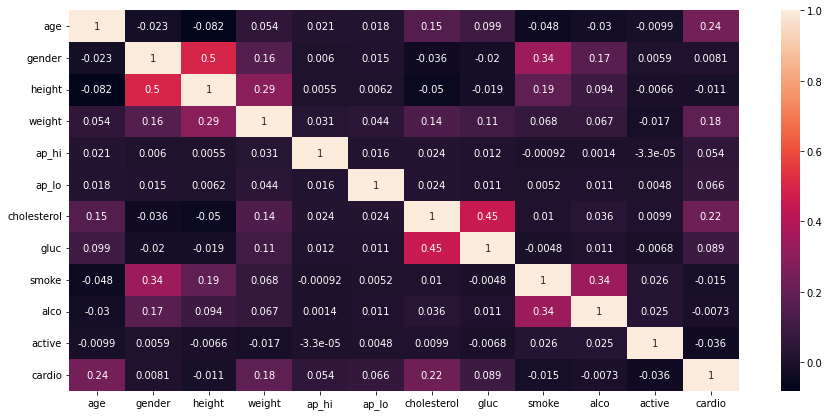

In [76]:
fig, heat = plt.subplots(figsize = (15,7))
heat =sns.heatmap(Cardio.corr(), annot=True)

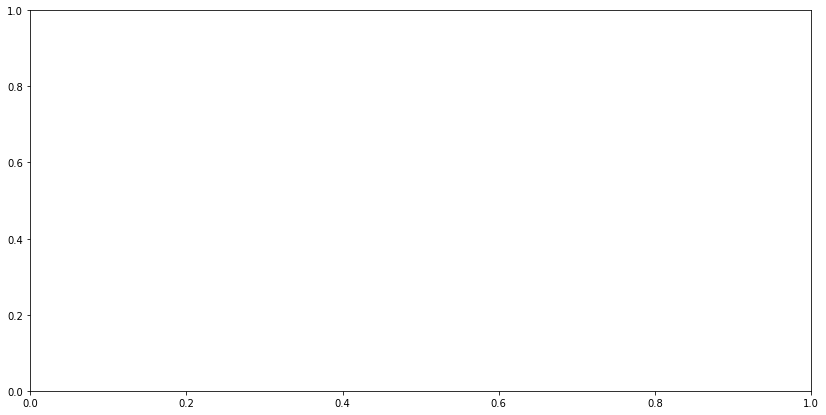

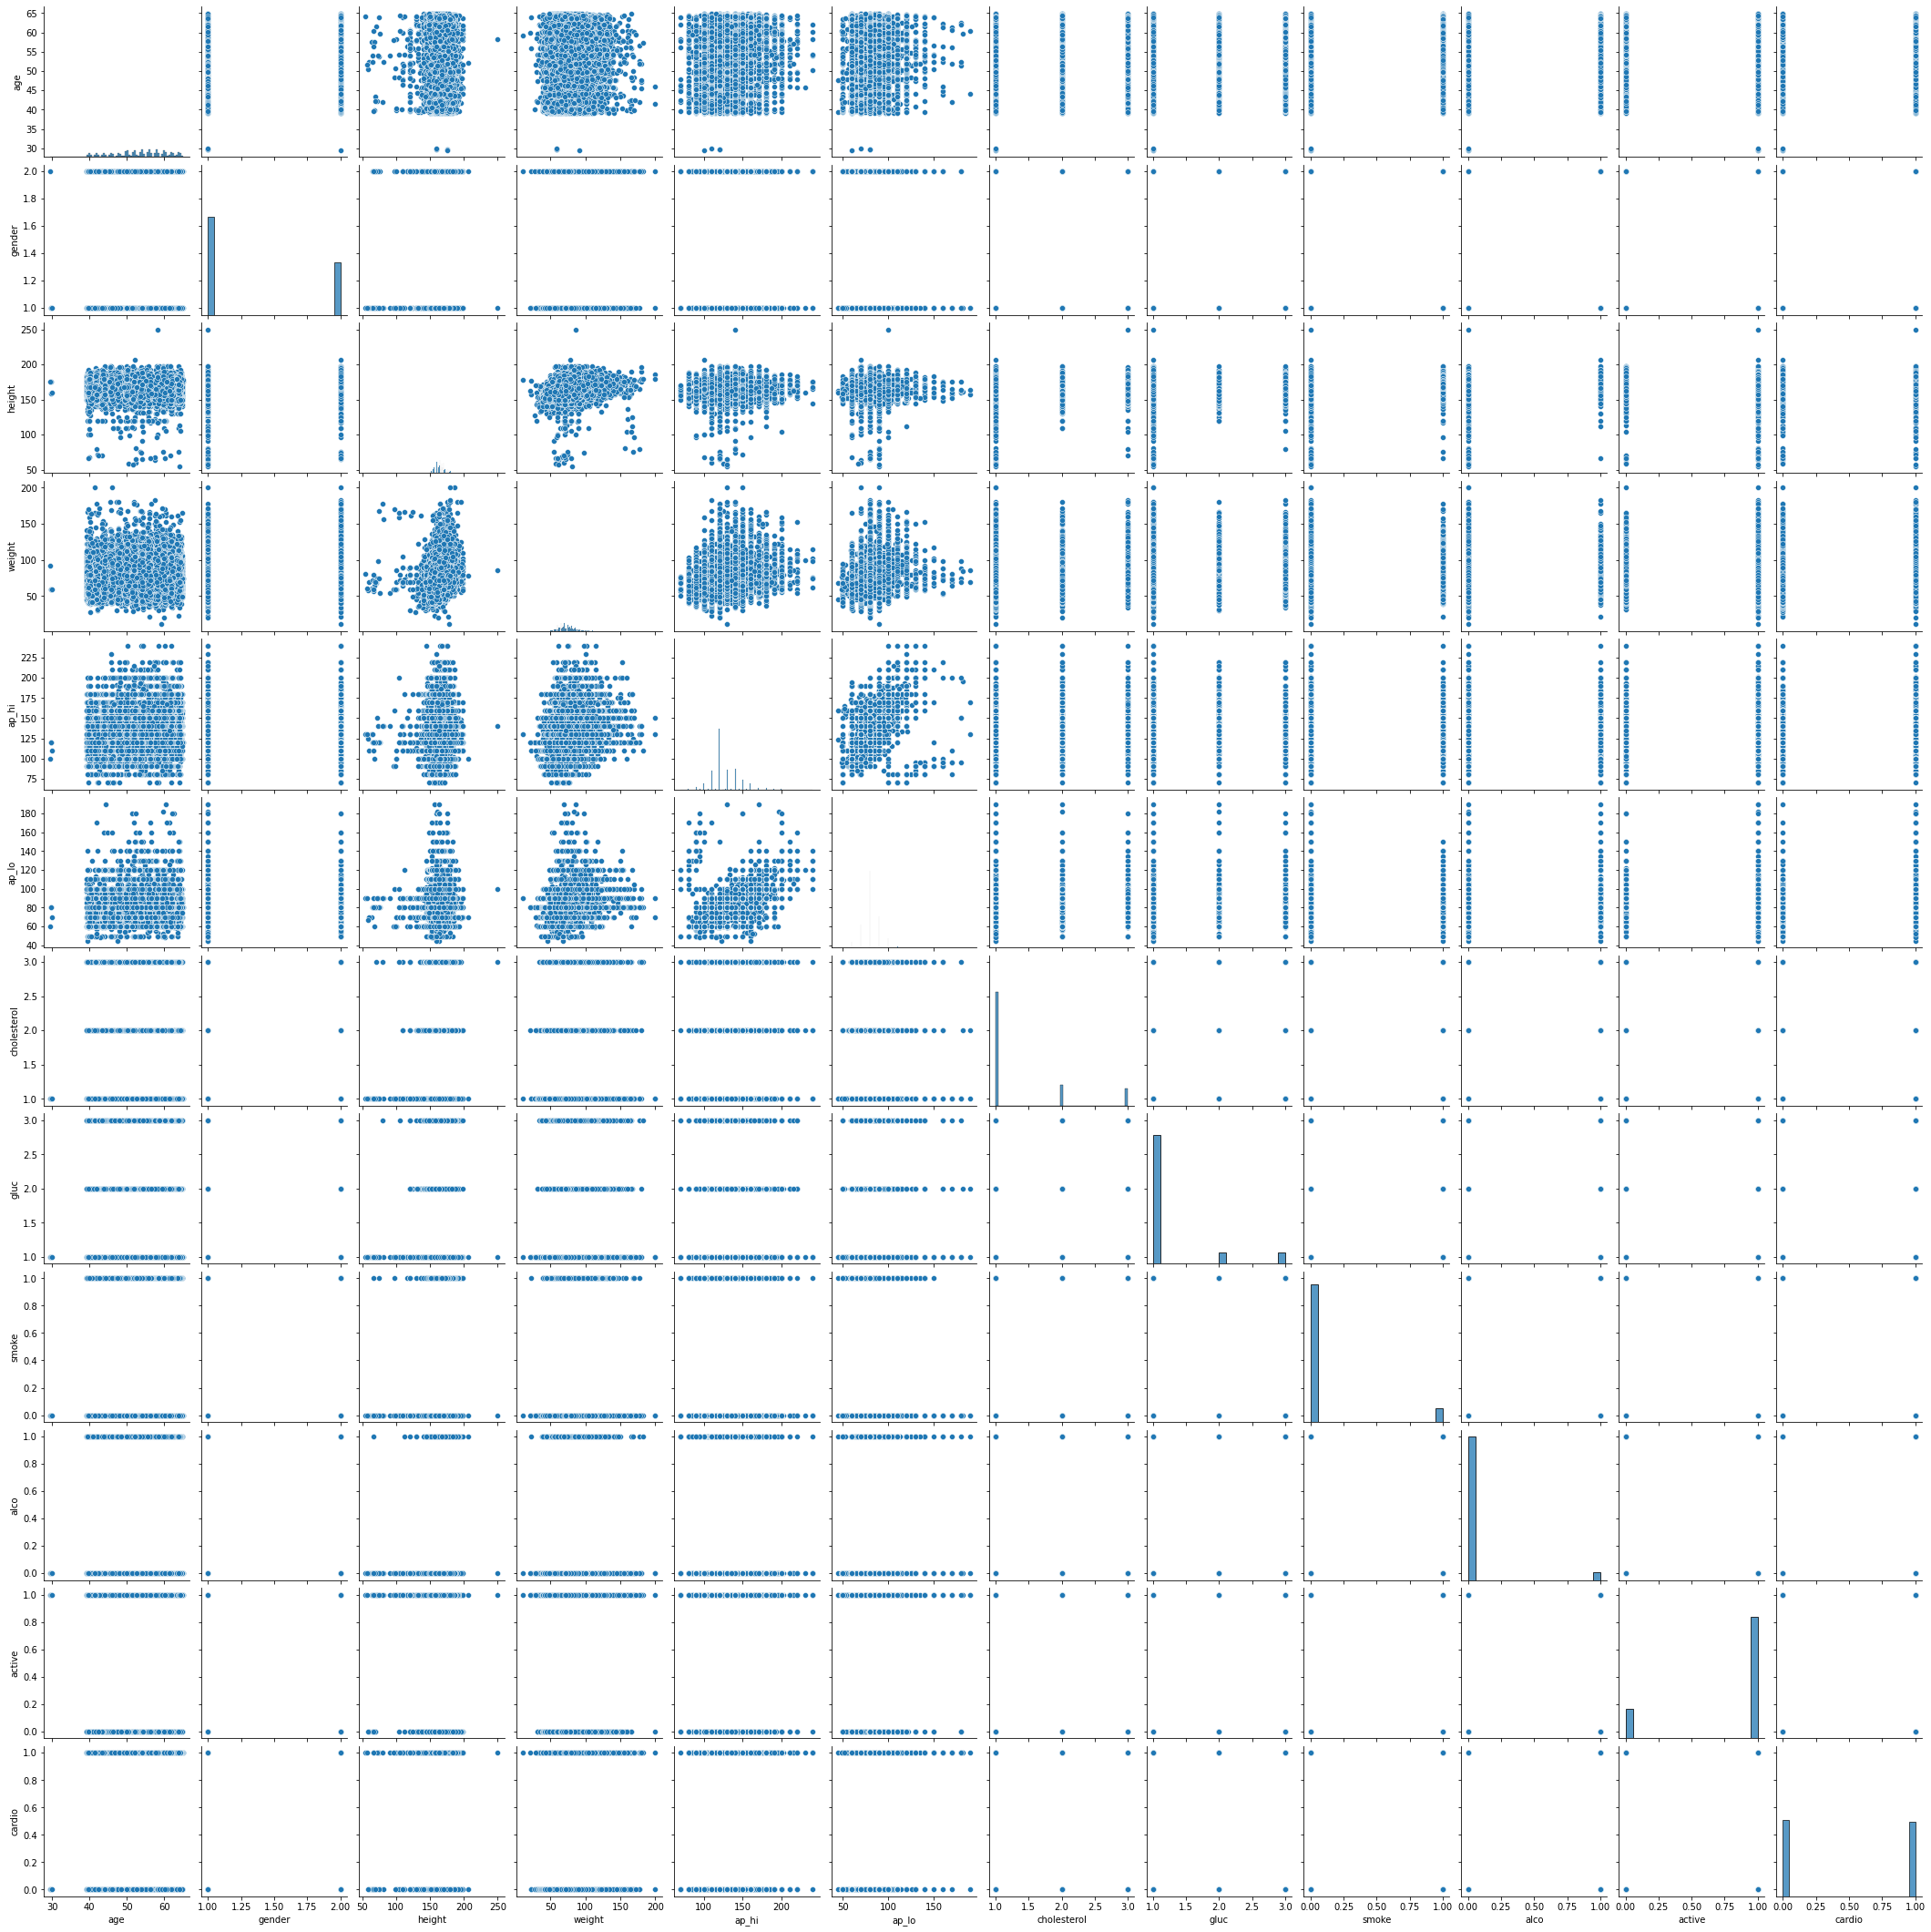

In [8]:
fig, cor = plt.subplots(figsize = (14,7))
cor = sns.pairplot(Cardio)

In [9]:
Cardio.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

<AxesSubplot:>

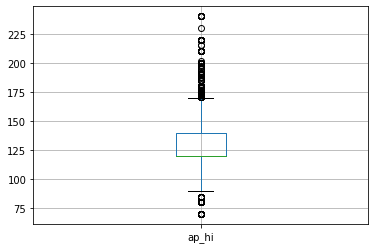

In [10]:
Cardio.boxplot(column=['ap_hi'])

<AxesSubplot:>

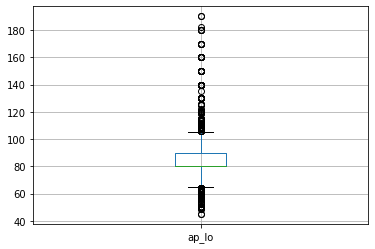

In [11]:
Cardio.boxplot(column=['ap_lo'])

<AxesSubplot:>

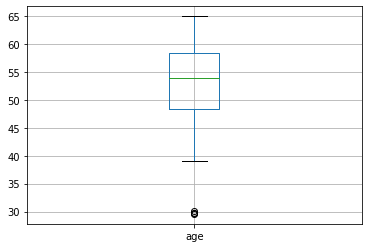

In [12]:

Cardio.boxplot(column=['age'])

<AxesSubplot:>

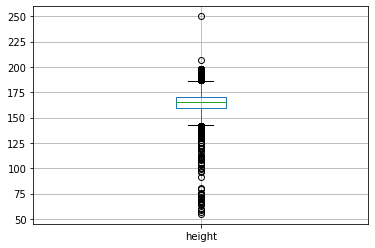

In [13]:
Cardio.boxplot(column=['height'])

<AxesSubplot:>

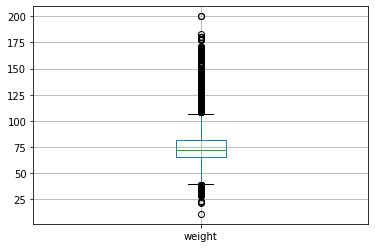

In [14]:
Cardio.boxplot(column=['weight'])

In [15]:
Cardio['weight'].describe()

count    68735.000000
mean        74.125955
std         14.331694
min         11.000000
25%         65.000000
50%         72.000000
75%         82.000000
max        200.000000
Name: weight, dtype: float64

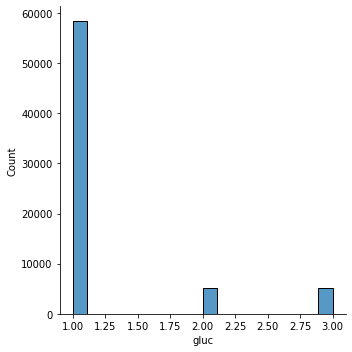

In [20]:
sns.displot(Cardio['gluc'])

In [21]:
Cardio.cardio.value_counts()

0    34714
1    34021
Name: cardio, dtype: int64

<AxesSubplot:xlabel='cardio', ylabel='count'>

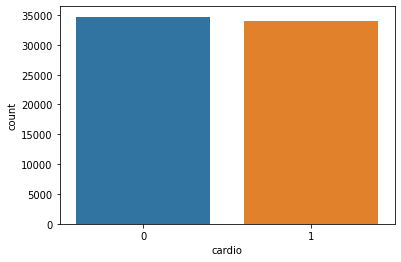

In [22]:
sns.countplot(x='cardio', data=Cardio)

In [23]:
Cardio.groupby('cardio').mean()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
cardio,,,,,,,,,,,
0,51.724064,1.345451,164.450884,71.577914,119.568042,78.179611,1.215965,1.175030,0.092614,0.055511,0.818056
1,54.963710,1.352282,164.272449,76.725899,133.814144,84.670439,1.516769,1.278122,0.083390,0.051792,0.788395


In [20]:
# средний возраст у имеющих заболевание - выше
# средний вес/давление/холестерин/глюкоза у имеющих заболевание - выше
# средний показатель курения/употребления алкоголя/физ. активность у НЕимеющих заболевание - выше!

In [24]:
Cardio.groupby('gender').mean()

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
gender,,,,,,,,,,,
1,53.442339,161.370414,72.490795,125.868158,80.922293,1.383082,1.234930,0.017785,0.025448,0.801667,0.492337
2,53.113287,169.948034,77.178317,128.021396,82.269675,1.330817,1.209492,0.219210,0.106352,0.806565,0.499854


In [22]:
# у женщин более старшего возраста (при более высоком уровне холестерина и глюкозы, показатель наличия заболевания - ниже)

In [25]:
Cardio.groupby('gluc').mean()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,alco,active,cardio
gluc,,,,,,,,,,,
1,53.076216,1.352627,164.430532,73.402172,125.899966,81.050813,1.248691,0.087917,0.051754,0.805015,0.475732
2,53.922501,1.339708,163.990339,78.941285,131.150631,83.519716,1.665615,0.103707,0.078273,0.788249,0.588722
3,55.557288,1.315307,163.964456,77.540302,130.258934,83.143321,2.370342,0.074336,0.051213,0.799732,0.618766


In [24]:
# с 53.9 лет вероятность наличия заболевания составляет ~59%, а с 55.55 лет уже ~62%
# чем старше человек, тем вероятнее у него наличие кардио-заболевания (и более высокого уровня глюкозы и холестерина)

In [26]:
Cardio.groupby('cholesterol').mean()

,age,gender,height,weight,ap_hi,ap_lo,gluc,smoke,alco,active,cardio
cholesterol,,,,,,,,,,,
1,52.817965,1.358666,164.595565,72.992871,124.766283,80.536408,1.099377,0.085194,0.048039,0.802216,0.435653
2,53.701378,1.327605,163.859291,76.550726,130.840279,83.167562,1.334479,0.105693,0.075725,0.798067,0.596455
3,56.217520,1.309614,163.433663,78.670053,133.748605,84.891299,1.926180,0.085870,0.064434,0.817225,0.762811


In [27]:
# с 53.7 лет вероятность наличия заболевания составляет ~60%, а с 56.2 лет уже ~76%
# чем старше человек, тем вероятнее у него наличие кардио-заболевания (и более высокого уровня холестерина и глюкозы)

In [28]:
Cardio.groupby('active').mean()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,cardio
active,,,,,,,,,,,
0,53.470984,1.343174,164.484573,74.640481,126.667111,81.389271,1.352349,1.234554,0.073474,0.042249,0.532667
1,53.292451,1.350217,164.332706,74.000025,126.607570,81.393046,1.367910,1.223977,0.091615,0.056465,0.485730


In [28]:
#вероятность наличия кардио-заболевания при условии физической активности и употребления алкоголя и курении ниже, чем при гиподинамии

Text(0, 0.5, 'Frequency of cardio diseases')

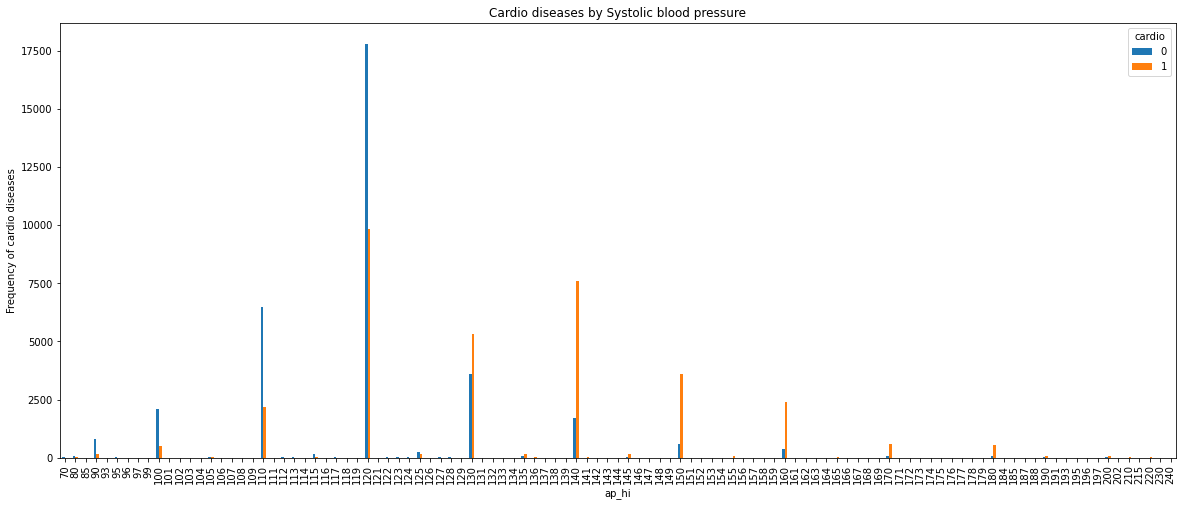

In [33]:
pd.crosstab(Cardio.ap_hi,Cardio.cardio).plot(kind='bar',figsize = (20,8))
plt.title('Cardio diseases by Systolic blood pressure')
plt.xlabel('ap_hi')
plt.ylabel('Frequency of cardio diseases')

Text(0, 0.5, 'Frequency of cardio diseases')

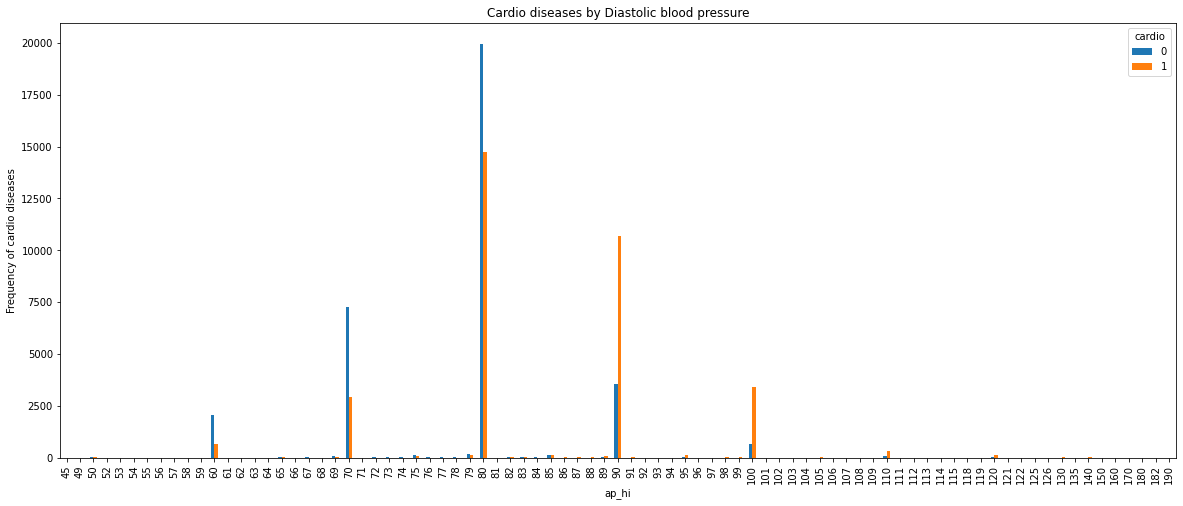

In [34]:
pd.crosstab(Cardio.ap_lo,Cardio.cardio).plot(kind='bar',figsize = (20,8))
plt.title('Cardio diseases by Diastolic blood pressure')
plt.xlabel('ap_hi')
plt.ylabel('Frequency of cardio diseases')

Text(0, 0.5, 'Frequency of cardio diseases')

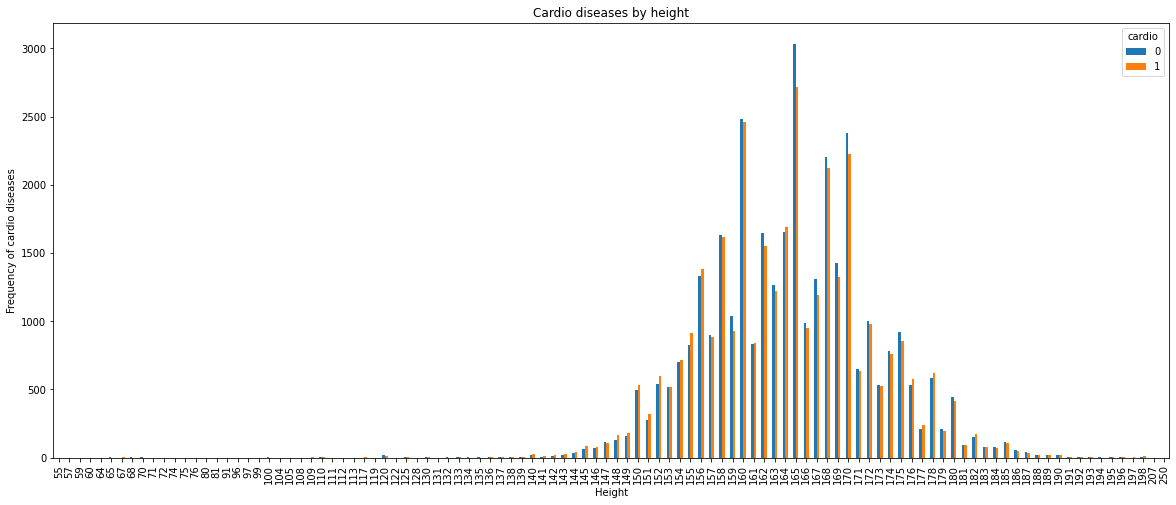

In [35]:
pd.crosstab(Cardio.height,Cardio.cardio).plot(kind='bar',figsize = (20,8))
plt.title('Cardio diseases by height')
plt.xlabel('Height')
plt.ylabel('Frequency of cardio diseases')

Text(0, 0.5, 'Frequency of cardio diseases')

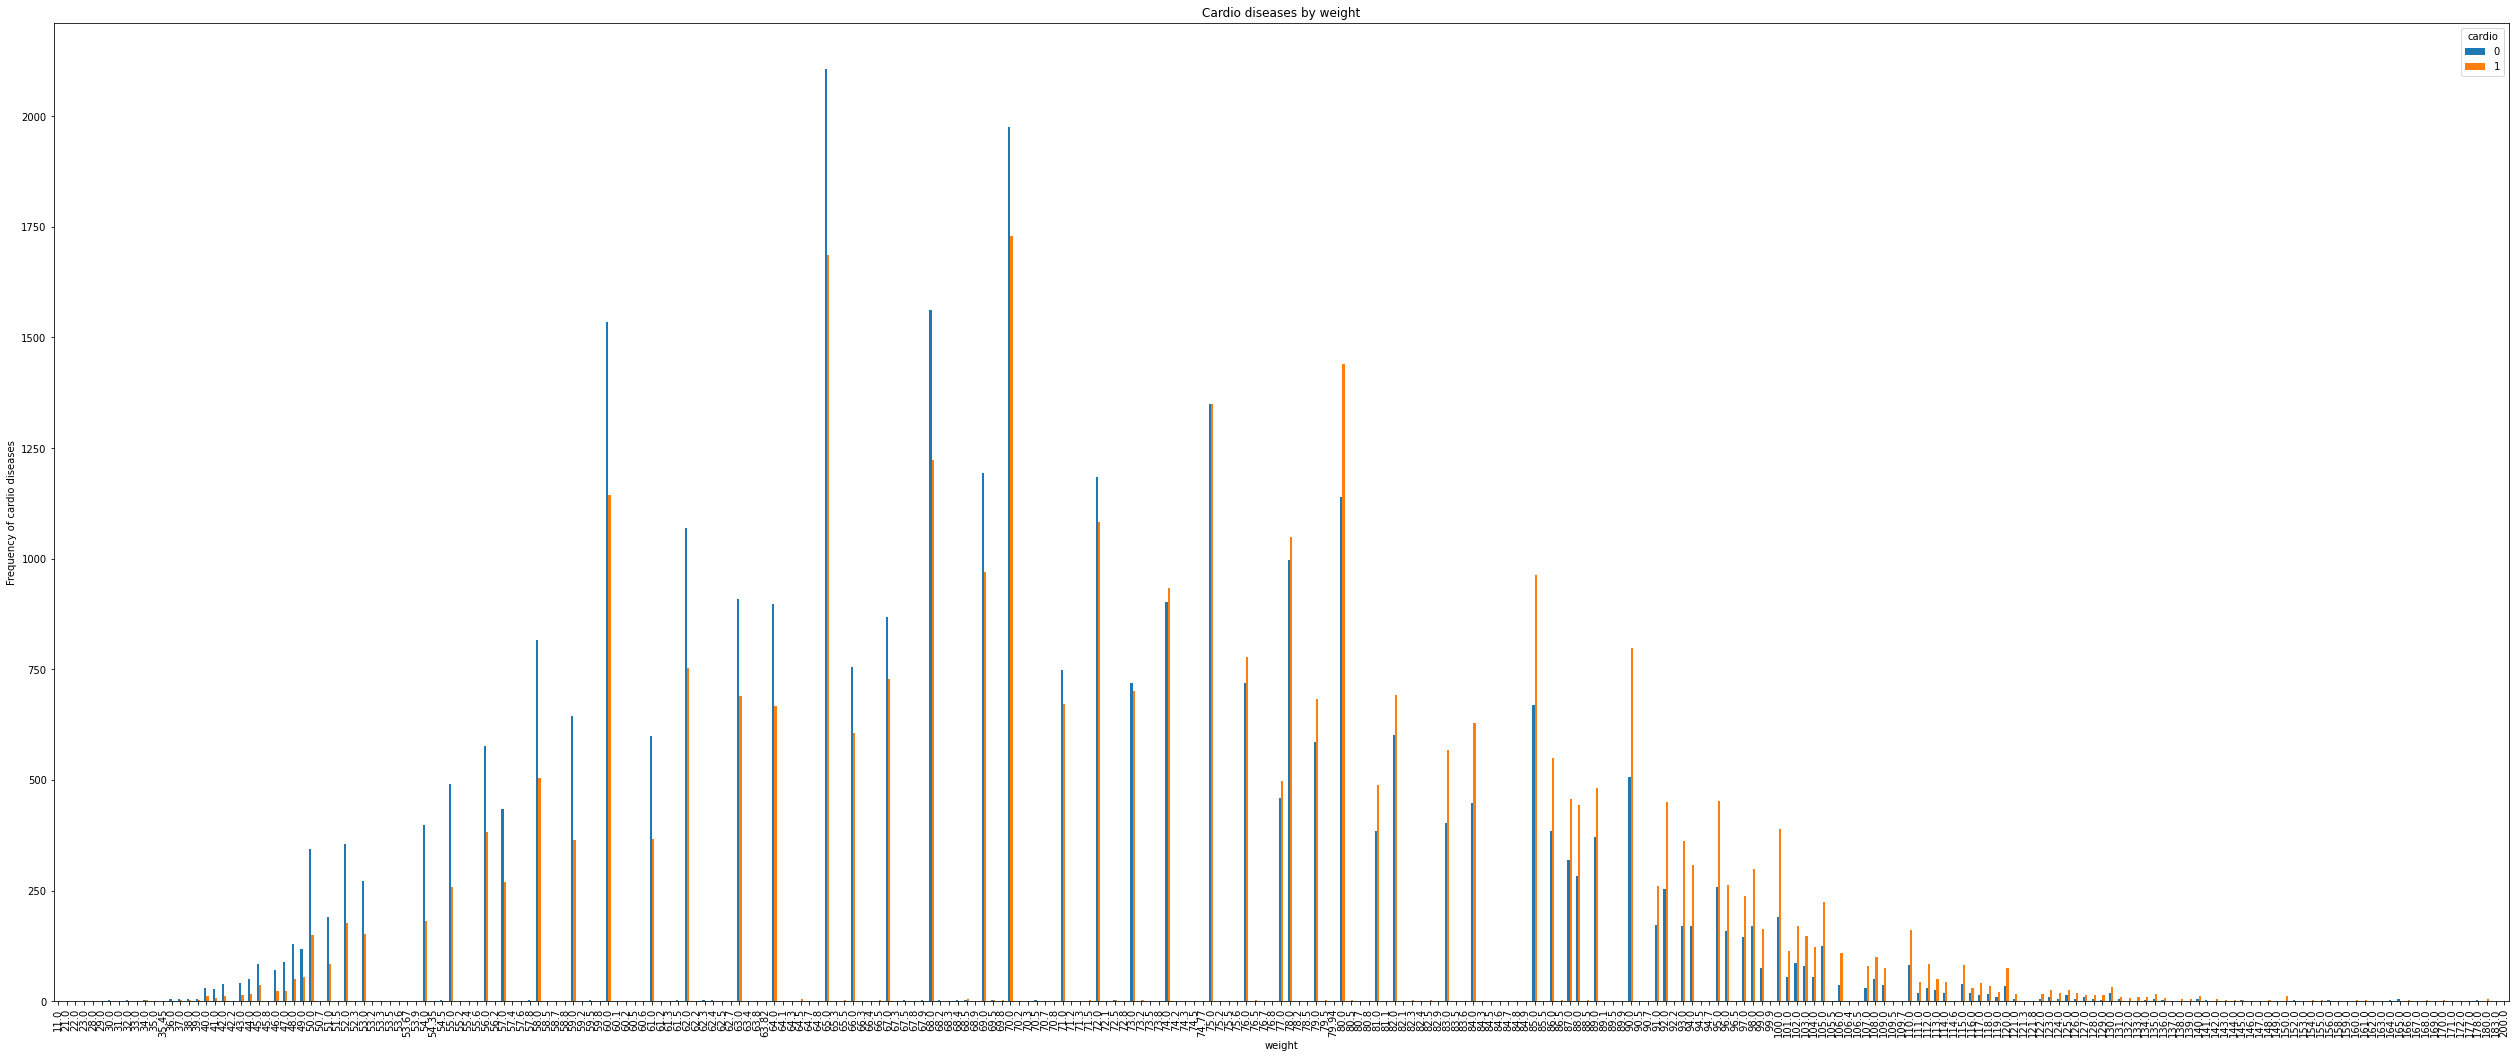

In [42]:
pd.crosstab(Cardio.weight,Cardio.cardio).plot(kind='bar',figsize = (44,18))
plt.title('Cardio diseases by weight')
plt.xlabel('weight')
plt.ylabel('Frequency of cardio diseases')

Text(0, 0.5, 'Frequency of cardio diseases')

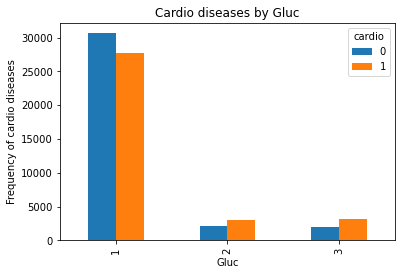

In [33]:
pd.crosstab(Cardio.gluc,Cardio.cardio).plot(kind='bar')
plt.title('Cardio diseases by Gluc')
plt.xlabel('Gluc')
plt.ylabel('Frequency of cardio diseases')

# | gluc | 1: normal, 2: above normal, 3: well above normal |

Text(0, 0.5, 'Frequency of cardio diseases')

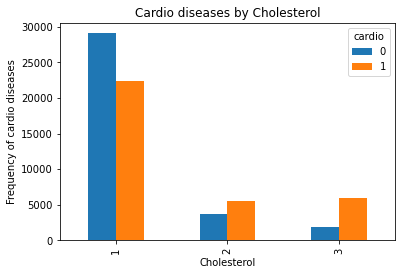

In [34]:
pd.crosstab(Cardio.cholesterol,Cardio.cardio).plot(kind='bar')
plt.title('Cardio diseases by Cholesterol')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency of cardio diseases')
# | cholesterol | 1: normal, 2: above normal, 3: well above normal |

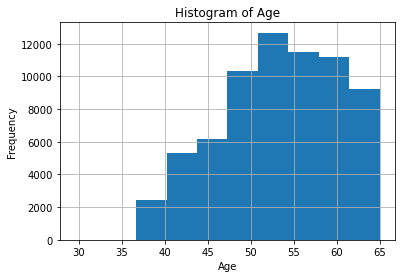

In [35]:
Cardio.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

Text(0, 0.5, 'Frequency of cardio diseases')

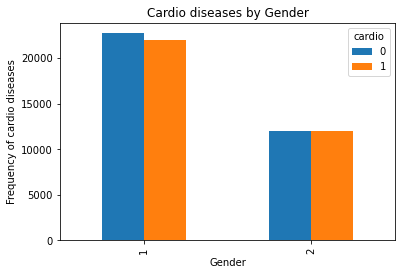

In [36]:
pd.crosstab(Cardio.gender,Cardio.cardio).plot(kind='bar')
plt.title('Cardio diseases by Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency of cardio diseases')

Text(0, 0.5, 'Frequency of cardio diseases')

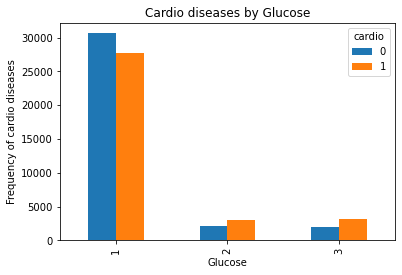

In [37]:
pd.crosstab(Cardio.gluc,Cardio.cardio).plot(kind='bar')
plt.title('Cardio diseases by Glucose')
plt.xlabel('Glucose')
plt.ylabel('Frequency of cardio diseases')

Text(0, 0.5, 'Frequency of cardio diseases')

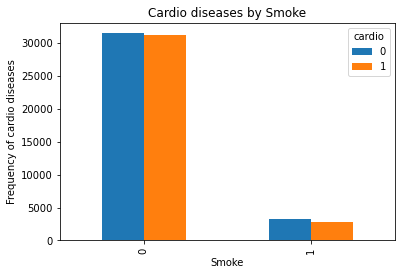

In [38]:
pd.crosstab(Cardio.smoke,Cardio.cardio).plot(kind='bar')
plt.title('Cardio diseases by Smoke')
plt.xlabel('Smoke')
plt.ylabel('Frequency of cardio diseases')

Text(0, 0.5, 'Frequency of cardio diseases')

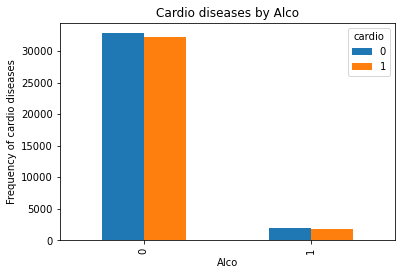

In [39]:
pd.crosstab(Cardio.alco,Cardio.cardio).plot(kind='bar')
plt.title('Cardio diseases by Alco')
plt.xlabel('Alco')
plt.ylabel('Frequency of cardio diseases')

Text(0, 0.5, 'Frequency of cardio diseases')

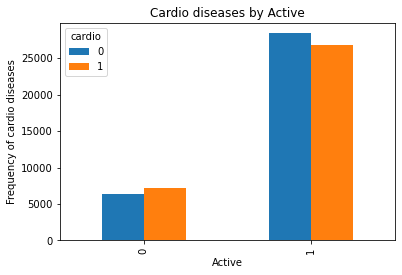

In [40]:
pd.crosstab(Cardio.active,Cardio.cardio).plot(kind='bar')
plt.title('Cardio diseases by Active')
plt.xlabel('Active')
plt.ylabel('Frequency of cardio diseases')

In [41]:
Cardio.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [43]:
X = Cardio[['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',       #атрибуты
       'gluc', 'smoke', 'alco', 'active']]
y = Cardio['cardio']                                                                     #метки

In [44]:
logit_model = sm.Logit(y,X)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.579079
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 cardio   No. Observations:                68735
Model:                          Logit   Df Residuals:                    68724
Method:                           MLE   Df Model:                           10
Date:                Sun, 10 Apr 2022   Pseudo R-squ.:                  0.1645
Time:                        21:17:26   Log-Likelihood:                -39803.
converged:                       True   LL-Null:                       -47640.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
age             0.0300      0.001     24.024      0.000       0.028       0.032
gender          0.3302    

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
lm = LogisticRegression(random_state=0, max_iter=800)
lm.fit(X_train,y_train)

LogisticRegression(max_iter=800, random_state=0)

In [46]:
# Predict class labels on a test data
LR1_pred_labels = lm.predict(X_test)

print('Coefficient : \n' , lm.coef_)
print('Intercept: \n', lm.intercept_)
print('R^2 value: \n', lm.score(X,y))

Coefficient : 
 [[ 0.05048418 -0.00700417 -0.00350363  0.01000591  0.05398562  0.01528975
   0.48888543 -0.1087718  -0.16288797 -0.22295737 -0.25223383]]
Intercept: 
 [-11.20983711]
R^2 value: 
 0.7269076889503164


In [47]:
# Таким образом, уравнение логистической регрессии будет выглядеть так
eq_str = F"z = {lm.intercept_[0]} + "
coef = [str(c) + F" * x{i + 1} + " for i, c in enumerate(lm.coef_[0])]
eq_str = (eq_str + ''.join(coef))[:-2]
print(eq_str)

z = -11.209837109969602 + 0.05048418326787514 * x1 + -0.007004167565128136 * x2 + -0.003503625994310205 * x3 + 0.01000590516267132 * x4 + 0.05398561971462194 * x5 + 0.015289750046697541 * x6 + 0.4888854342892266 * x7 + -0.10877180337795156 * x8 + -0.16288796639492348 * x9 + -0.22295736931437163 * x10 + -0.25223382582935644 * x11 


In [48]:
# Use score method to get accuracy of model
from sklearn.metrics import roc_auc_score, roc_curve

score = lm.score(X_test, y_test)
print('Accuracy Score: ', score)
print('--------------------------------------------------------')
# Look at classification report to evaluate the model
print(classification_report(y_test, LR1_pred_labels))

Accuracy Score:  0.7286680730341165
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.70      0.79      0.74      6871
           1       0.76      0.67      0.71      6876

    accuracy                           0.73     13747
   macro avg       0.73      0.73      0.73     13747
weighted avg       0.73      0.73      0.73     13747



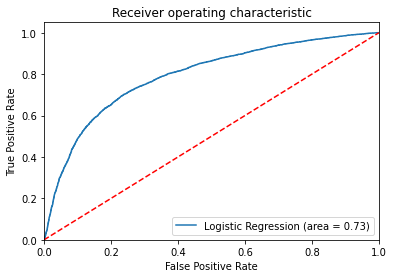

In [49]:
# ROC-кривая
logit_roc_auc = roc_auc_score(y_test, lm.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [50]:
# Матрица ошибок
cf = confusion_matrix(y_test, LR1_pred_labels)
print(cf)

[[5414 1457]
 [2273 4603]]


In [53]:
# Результат показывает, что у нас 5414+1457 верных прогнозов и 2273+4603 ошибочных.

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  
    test_size=0.2, random_state=0)

state = 12  
test_size = 0.30
  
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,  
    test_size=test_size, random_state=state)


lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_val, y_val)))

Learning rate:  0.05
Accuracy score (training): 0.713
Accuracy score (validation): 0.714
Learning rate:  0.075
Accuracy score (training): 0.715
Accuracy score (validation): 0.716
Learning rate:  0.1
Accuracy score (training): 0.717
Accuracy score (validation): 0.714
Learning rate:  0.25
Accuracy score (training): 0.724
Accuracy score (validation): 0.726
Learning rate:  0.5
Accuracy score (training): 0.728
Accuracy score (validation): 0.732
Learning rate:  0.75
Accuracy score (training): 0.730
Accuracy score (validation): 0.734
Learning rate:  1
Accuracy score (training): 0.730
Accuracy score (validation): 0.734


In [52]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.75, max_features=2, max_depth=3, random_state=0)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("")

print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[5448 1423]
 [2245 4631]]

Classification Report
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      6871
           1       0.76      0.67      0.72      6876

    accuracy                           0.73     13747
   macro avg       0.74      0.73      0.73     13747
weighted avg       0.74      0.73      0.73     13747



In [53]:
gb_clf.fit(X_test, y_test)

GradientBoostingClassifier(learning_rate=1, max_depth=2, max_features=2,
                           n_estimators=20, random_state=0)

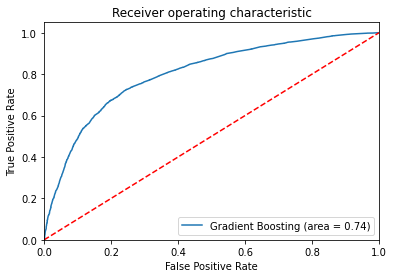

In [57]:
roc_auc = roc_auc_score(y_test, gb_clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, gb_clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gradient Boosting (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [54]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 0.2668218520404452
Mean Squared Error: 0.2668218520404452
Root Mean Squared Error: 0.5165480152323162


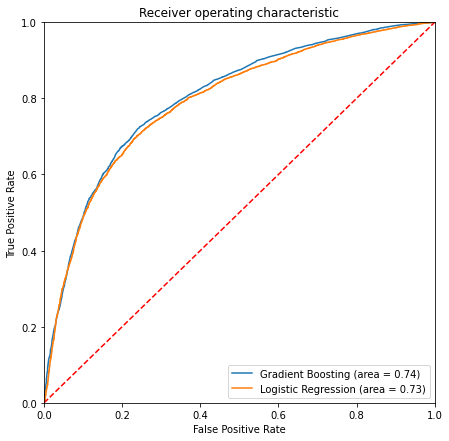

In [72]:
roc_auc = roc_auc_score(y_test, gb_clf.predict(X_test))
logit_roc_auc = roc_auc_score(y_test, lm.predict(X_test))
fpr1, tpr1, thresholds1 = roc_curve(y_test, gb_clf.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, lm.predict_proba(X_test)[:,1])
plt.figure(figsize=(7, 7))
plt.plot(fpr1, tpr1, label='Gradient Boosting (area = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()